In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 

In [4]:
md, lg = 15, 20 
plt.rc('font', size=md)
plt.rc('axes', labelsize=md)
plt.rc('xtick', labelsize=md)
plt.rc('ytick', labelsize=md)
plt.rc('legend', fontsize=md)
plt.rc('figure', titlesize=lg)

In [5]:
enrol = pd.read_csv('https://raw.githubusercontent.com/KolatimiDave/13-school-progress/master/data/gross-enrollment-ratio-2013-2016.csv')

In [6]:
enrol.head(5)
enrol.shape

(110, 14)

In [7]:
boys = ['Primary_Boys','Upper_Primary_Boys','Secondary_Boys','Higher_Secondary_Boys']
girls = ['Primary_Girls','Upper_Primary_Girls','Secondary_Girls','Higher_Secondary_Girls']

In [8]:
sum(enrol.isna().sum())   #Check for missing values

0

In [9]:
enrol['State_UT'].unique(), len(enrol['State_UT'].unique())

(array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
        'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
        'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
        'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand',
        'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
        'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
        'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan', 'Sikkim',
        'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttaranchal',
        'West Bengal', 'All India', 'MADHYA PRADESH', 'Puducherry',
        'Telangana', 'Uttarakhand'], dtype=object),
 40)

In [10]:
#rename States
enrol['State_UT'].replace({
    'MADHYA PRADESH':'Madhya Pradesh',
    'Pondicherry':'Puducherry',
    'Uttaranchal':'Uttar Pradesh'
},inplace=True)

In [11]:
states = enrol['State_UT'].unique().tolist()

In [12]:
all_cols = enrol.columns.to_list()

In [13]:
obj = [i for i in all_cols if enrol[i].dtype == object]
len(obj)

5

### There are 'NR' values in the last 3 columns so I would impute 0 for all 'NR' which means 'Not Recorded'.

In [14]:
imputer = SimpleImputer(missing_values = 'NR', strategy='constant', fill_value=0)
imputer_1 = SimpleImputer(missing_values = '@', strategy='constant', fill_value=0)

In [15]:
enrol = imputer_1.fit_transform(enrol)
enrol = pd.DataFrame(imputer.fit_transform(enrol), columns=all_cols)

In [16]:
enrol.head(3)

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.7,88.98,91.83,102.89,97.36,100.16,105.4,96.61,101.28
1,Andhra Pradesh,2013-14,96.62,96.87,96.74,82.81,84.38,83.57,73.76,76.77,75.2,59.83,60.83,60.3
2,Arunachal Pradesh,2013-14,129.12,127.77,128.46,112.64,115.27,113.94,88.37,84.89,86.65,65.16,65.38,65.27


In [17]:
categories = all_cols[2:]
enrol[categories] = enrol[categories].astype(float)

In [18]:
tmp = []
for categ in categories:
    tmp.append(pd.DataFrame({'mean_' + categ : enrol.groupby(['State_UT'])[categ].mean()}))

In [19]:
mean_enrol_per_state = pd.DataFrame(tmp[0])     # Initially add the first Student Category type in the DataFrame so it's easy to use pd.merge()
for Stu_type in range(1, len(tmp)):           # Starting at an Index of 1 since since I already initialized our dataframe with the first Student type 
    tmp[Stu_type].reset_index(inplace = True)
    mean_enrol_per_state = pd.merge(mean_enrol_per_state, tmp[Stu_type], on = 'State_UT')

In [20]:
mean_enrol_per_state.head(3)

,State_UT,mean_Primary_Boys,mean_Primary_Girls,mean_Primary_Total,mean_Upper_Primary_Boys,mean_Upper_Primary_Girls,mean_Upper_Primary_Total,mean_Secondary_Boys,mean_Secondary_Girls,mean_Secondary_Total,mean_Higher_Secondary_Boys,mean_Higher_Secondary_Girls,mean_Higher_Secondary_Total
0,All India,98.973333,101.590000,100.216667,87.58,95.203333,91.126667,78.030000,78.793333,78.386667,54.430000,53.933333,54.193333
1,Andaman & Nicobar Islands,93.306667,89.223333,91.260000,90.54,85.220000,87.863333,95.850000,90.590000,93.243333,92.323333,88.506667,90.516667
2,Andhra Pradesh,89.936667,89.676667,89.810000,81.09,81.850000,81.456667,73.283333,75.556667,74.370000,56.460000,58.376667,57.363333


In [21]:
mean_enrol_per_state.set_index('State_UT', inplace=True)
mean_enrol_per_state.head(3)

,mean_Primary_Boys,mean_Primary_Girls,mean_Primary_Total,mean_Upper_Primary_Boys,mean_Upper_Primary_Girls,mean_Upper_Primary_Total,mean_Secondary_Boys,mean_Secondary_Girls,mean_Secondary_Total,mean_Higher_Secondary_Boys,mean_Higher_Secondary_Girls,mean_Higher_Secondary_Total
State_UT,,,,,,,,,,,,
All India,98.973333,101.590000,100.216667,87.58,95.203333,91.126667,78.030000,78.793333,78.386667,54.430000,53.933333,54.193333
Andaman & Nicobar Islands,93.306667,89.223333,91.260000,90.54,85.220000,87.863333,95.850000,90.590000,93.243333,92.323333,88.506667,90.516667
Andhra Pradesh,89.936667,89.676667,89.810000,81.09,81.850000,81.456667,73.283333,75.556667,74.370000,56.460000,58.376667,57.363333


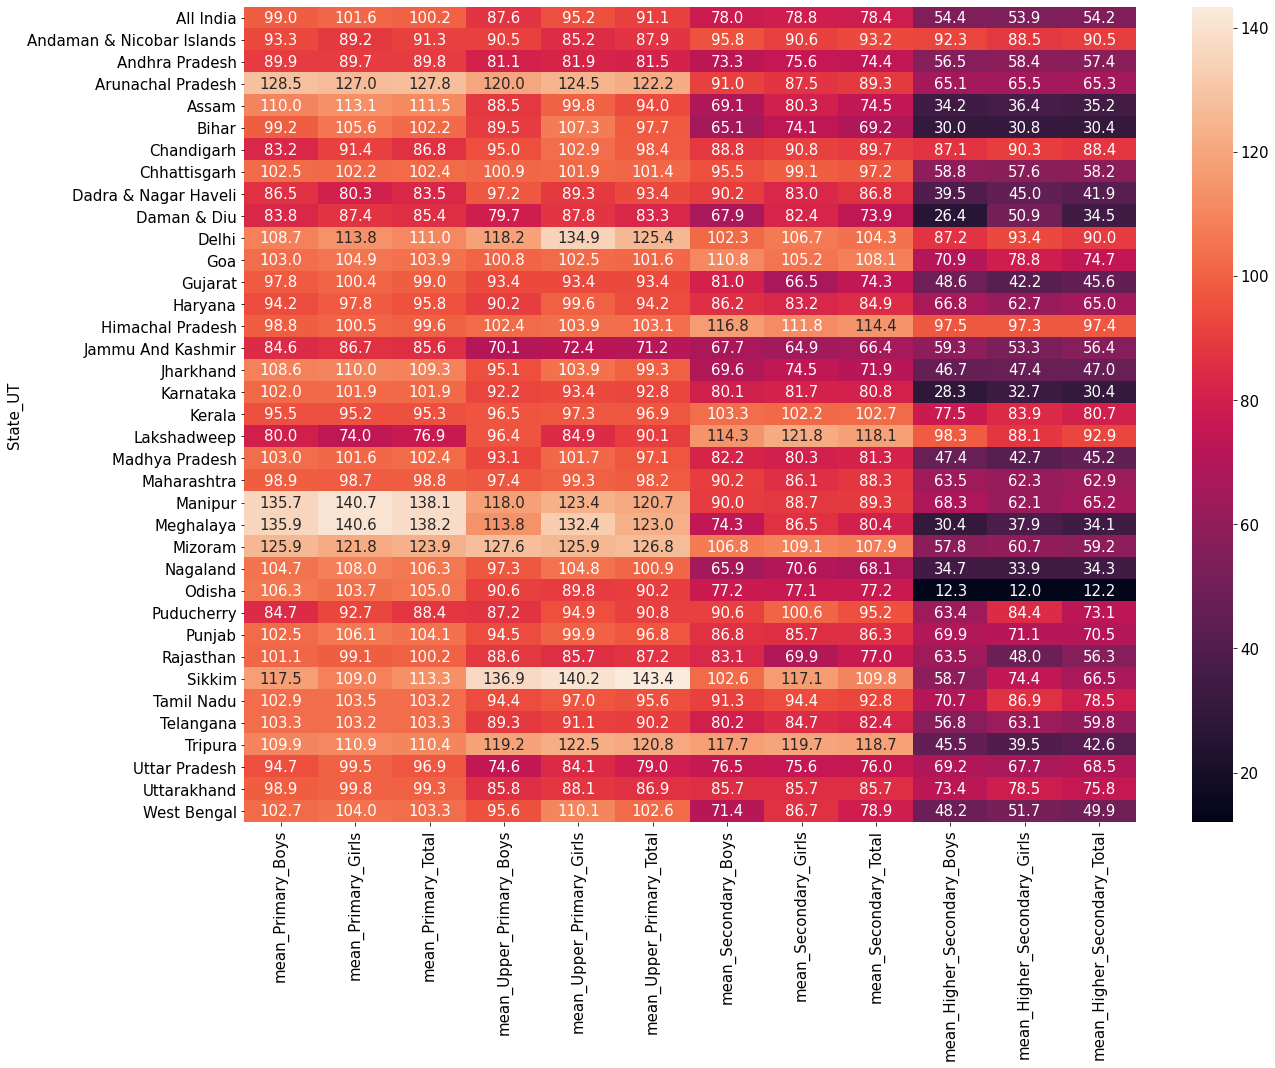

In [22]:
plt.figure(figsize=(20, 15))
sns.heatmap(mean_enrol_per_state, annot = True, fmt='.1f')

### From the above heat map we can't conclude yet which state has the overall highest and lowest gross enrollment 

## Further Exploratory Data Analysis on the Drop_out Ratio

In [23]:
mean_enrol_per_state.head(3)

,mean_Primary_Boys,mean_Primary_Girls,mean_Primary_Total,mean_Upper_Primary_Boys,mean_Upper_Primary_Girls,mean_Upper_Primary_Total,mean_Secondary_Boys,mean_Secondary_Girls,mean_Secondary_Total,mean_Higher_Secondary_Boys,mean_Higher_Secondary_Girls,mean_Higher_Secondary_Total
State_UT,,,,,,,,,,,,
All India,98.973333,101.590000,100.216667,87.58,95.203333,91.126667,78.030000,78.793333,78.386667,54.430000,53.933333,54.193333
Andaman & Nicobar Islands,93.306667,89.223333,91.260000,90.54,85.220000,87.863333,95.850000,90.590000,93.243333,92.323333,88.506667,90.516667
Andhra Pradesh,89.936667,89.676667,89.810000,81.09,81.850000,81.456667,73.283333,75.556667,74.370000,56.460000,58.376667,57.363333


In [24]:
all_mean_cols = mean_enrol_per_state.columns.to_list()               ## Get the enrol_per_state columns in a list


In [25]:
features = [i for i in all_mean_cols if i.split('_')[-1]!='Total']      ## I'ld be working with the Student types alone, without the Total columns since the Total is a composite feature of Boys and Girls.

In [26]:
total_enrol = []

for state in states:
    total_enrol.append(sum(mean_enrol_per_state.loc[state][features]))   # I could use all the features including the Total composite feature and still get similar result

In [27]:
total_enrol_per_state = pd.DataFrame(total_enrol, index=states, columns=['Total_enrol_per_state'])

In [36]:
total_enrol_per_state.head(5)

,Total_enrol_per_state
Andaman & Nicobar Islands,725.560000
Andhra Pradesh,606.230000
Arunachal Pradesh,809.096667
Assam,631.430000
Bihar,601.606667


In [28]:
sns.set_style("whitegrid")

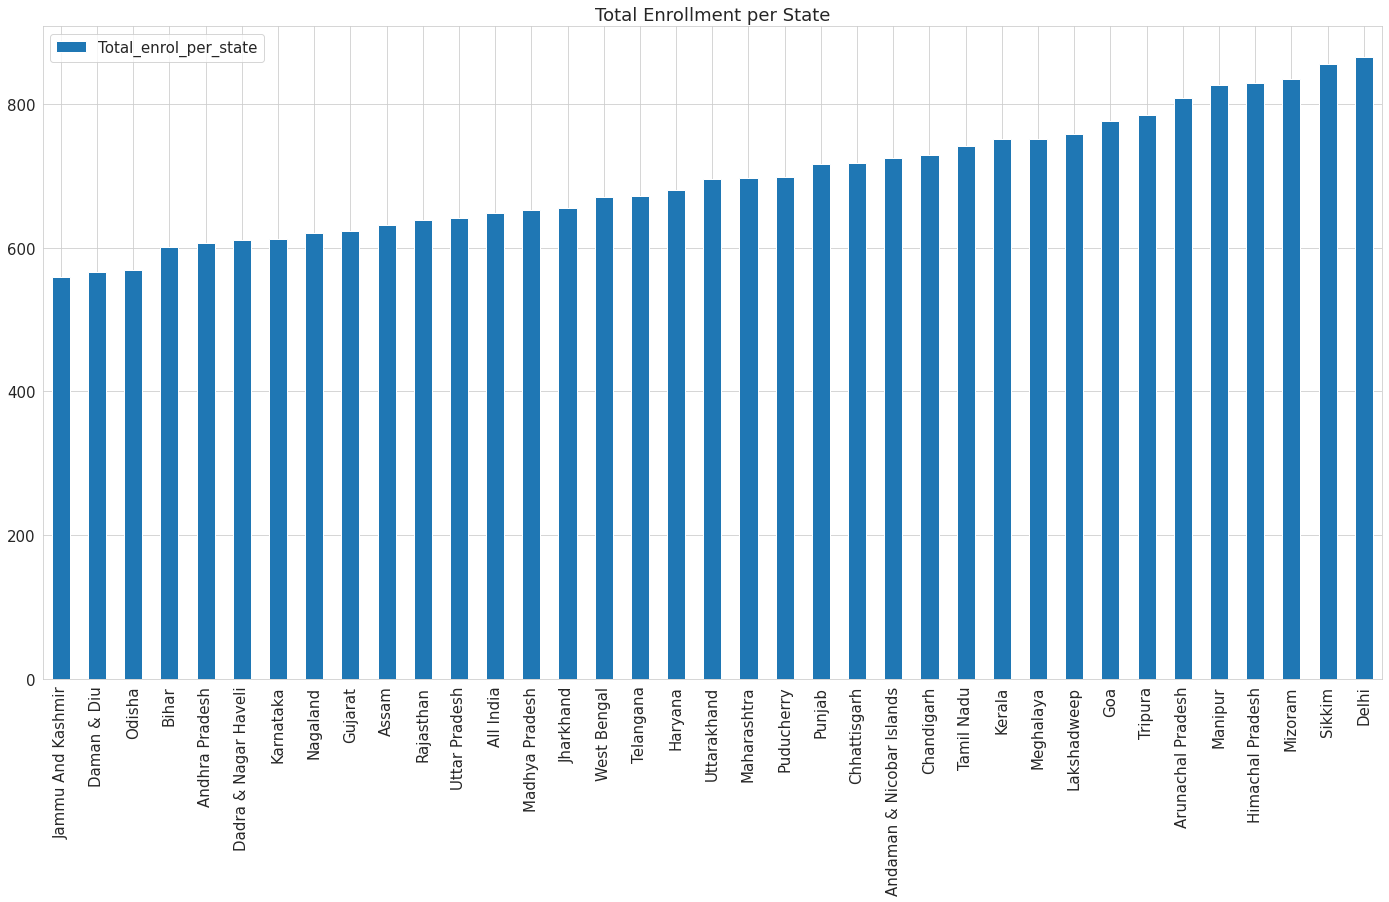

In [29]:
total_enrol_per_state.sort_values('Total_enrol_per_state').plot(kind='bar', figsize=(24,12), title ='Total Enrollment per State')

### From the above bar chart we can see clearly that, Delhi has the highest average of enrollments in all Student category type, while 'Jammu And Kashmir' has the lowest average of enrollments in the secondary school sections.



## In-depth Exploratory Data Analysis into the Student Category Types 


In [30]:
primary = [ i for i in all_mean_cols if i.split('_')[1] == 'Primary']
Upper_primary = [ i for i in all_mean_cols if i.split('_')[1] == 'Upper']
secondary = [ i for i in all_mean_cols if i.split('_')[1] == 'Secondary']
HrSecondary = [ i for i in all_mean_cols if i.split('_')[1] == 'Higher']

## Primary Student Category (Boys)

In [31]:
primary_boys = [i for i in primary if i.split('_')[-1] == 'Boys']

In [32]:
primary_boys_total_enrol = []

for state in states:
    primary_boys_total_enrol.append(sum(mean_enrol_per_state.loc[state][primary_boys]))   # Getting the total drop out for boys in the primary Student category type.

In [33]:
primary_boys_total_enrol_per_state = pd.DataFrame(primary_boys_total_enrol, index=states, columns=['Primary Boys total enrol per state'])


In [34]:
sns.set_style('white')

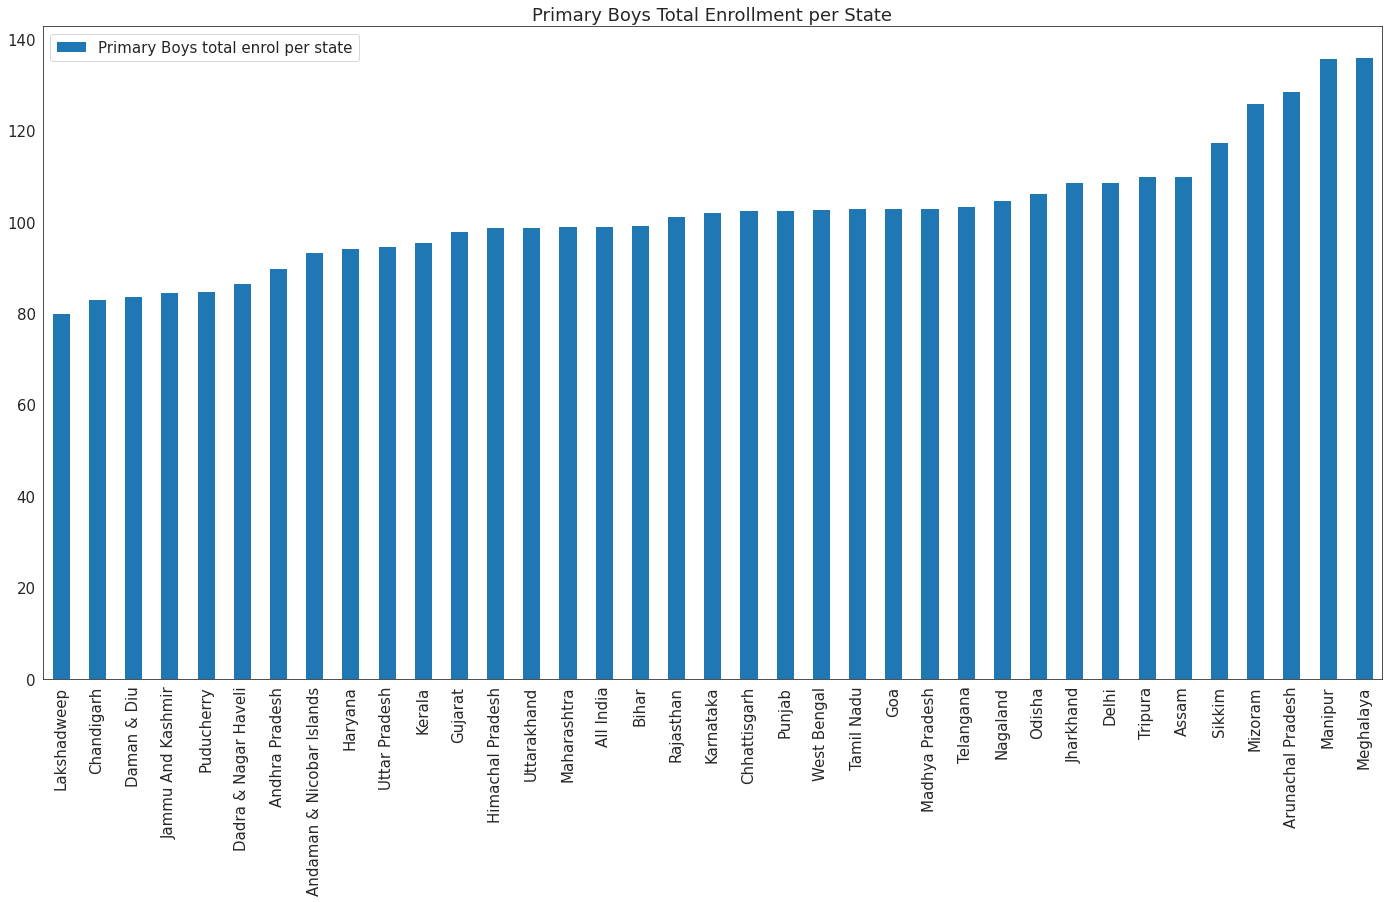

In [35]:
primary_boys_total_enrol_per_state.sort_values('Primary Boys total enrol per state').plot(kind='bar', figsize=(24,12), title = 'Primary Boys Total Enrollment per State')

### Lakshadweep state has the least enrollment of primary school boys, while Meghalaya state enrols the most primary school boys.

## Primary Student Category Girls

In [32]:
primary_girls = [i for i in primary if i.split('_')[-1] == 'Girls']

In [33]:
primary_girls_total_enrol = []

for state in states:
    primary_girls_total_enrol.append(sum(mean_enrol_per_state.loc[state][primary_girls]))   # Getting the total drop out for girls in the primary Student category type.

In [34]:
primary_girls_total_enrol_per_state = pd.DataFrame(primary_girls_total_enrol, index=states, columns=['Primary girls total enrol per state'])


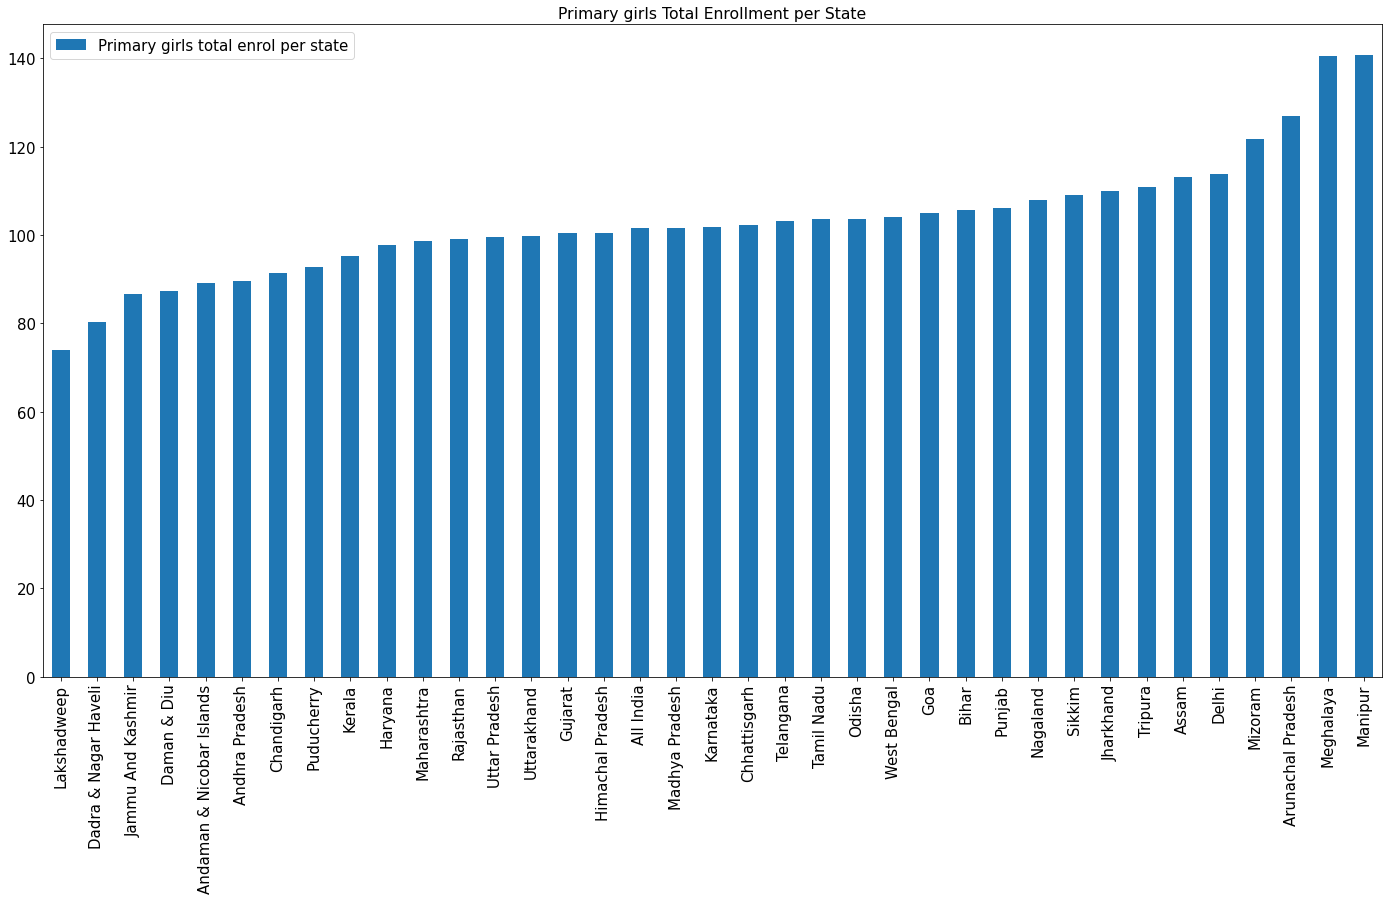

In [35]:
primary_girls_total_enrol_per_state.sort_values('Primary girls total enrol per state').plot(kind='bar', figsize=(24,12), title = 'Primary girls Total Enrollment per State')

### Lakshadweep state has the least enrollment of primary school girls, while Manipur state enrols the most primary school girls.

## Upper_Primary Student Category Boys

In [36]:
Upper_primary_boys = [i for i in Upper_primary if i.split('_')[-1] == 'Boys']

In [37]:
Upper_primary_boys_total_enrol = []

for state in states:
    Upper_primary_boys_total_enrol.append(sum(mean_enrol_per_state.loc[state][Upper_primary_boys]))   # Getting the total drop out for boys in the primary Student category type.

In [38]:
Upper_primary_boys_total_enrol_per_state = pd.DataFrame(Upper_primary_boys_total_enrol, index=states, columns=['Upper Primary boys total enrol per state'])


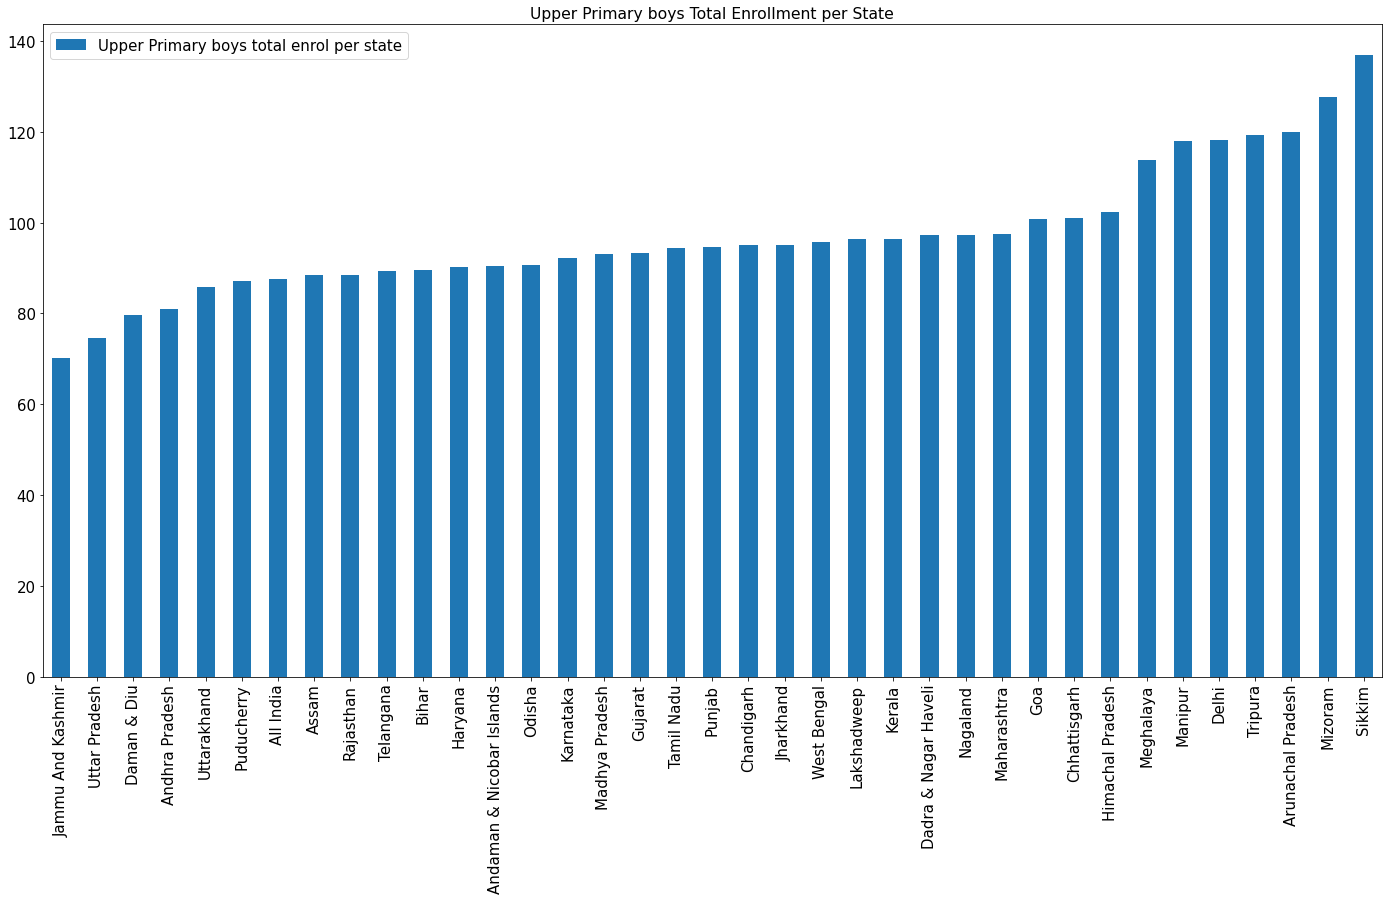

In [39]:
Upper_primary_boys_total_enrol_per_state.sort_values('Upper Primary boys total enrol per state').plot(kind='bar', figsize=(24,12), title = 'Upper Primary boys Total Enrollment per State')

### 'Jammu and Kashmir' state has the least enrollment of Upper primary school boys, while Sikkim state enrols the most Upper primary school boys.

## Upper Primary Girls

In [40]:
Upper_primary_girls = [i for i in Upper_primary if i.split('_')[-1] == 'Girls']

In [41]:
Upper_primary_girls_total_enrol = []

for state in states:
    Upper_primary_girls_total_enrol.append(sum(mean_enrol_per_state.loc[state][Upper_primary_girls]))   # Getting the total drop out for girls in the primary Student category type.

In [42]:
Upper_primary_girls_total_enrol_per_state = pd.DataFrame(Upper_primary_girls_total_enrol, index=states, columns=['Upper Primary girls total enrol per state'])


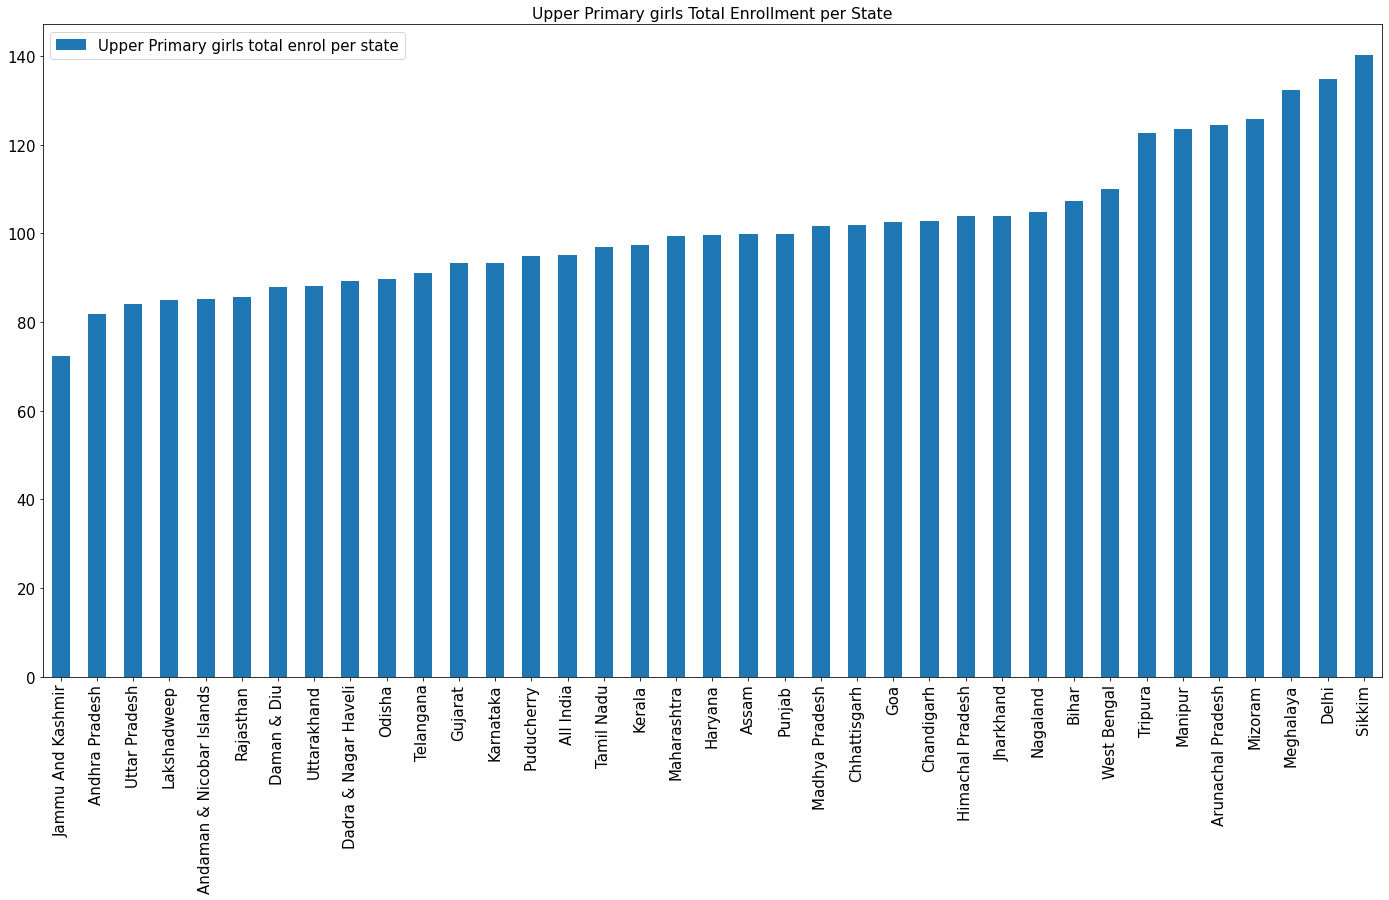

In [43]:
Upper_primary_girls_total_enrol_per_state.sort_values('Upper Primary girls total enrol per state').plot(kind='bar', figsize=(24,12), title = 'Upper Primary girls Total Enrollment per State')

### 'Jammu And Kashmir' state has the least enrollment of Upper primary school girls, while Sikkim state enrols the most Upper primary school girls.

## Secondary Student Boys

In [44]:
secondary_boys = [i for i in secondary if i.split('_')[-1] == 'Boys']

In [45]:
secondary_boys_total_enrol = []

for state in states:
    secondary_boys_total_enrol.append(sum(mean_enrol_per_state.loc[state][secondary_boys]))   # Getting the total drop out for boys in the primary Student category type.

In [46]:
secondary_boys_total_enrol_per_state = pd.DataFrame(secondary_boys_total_enrol, index=states, columns=[' Secondary  boys total enrol per state'])


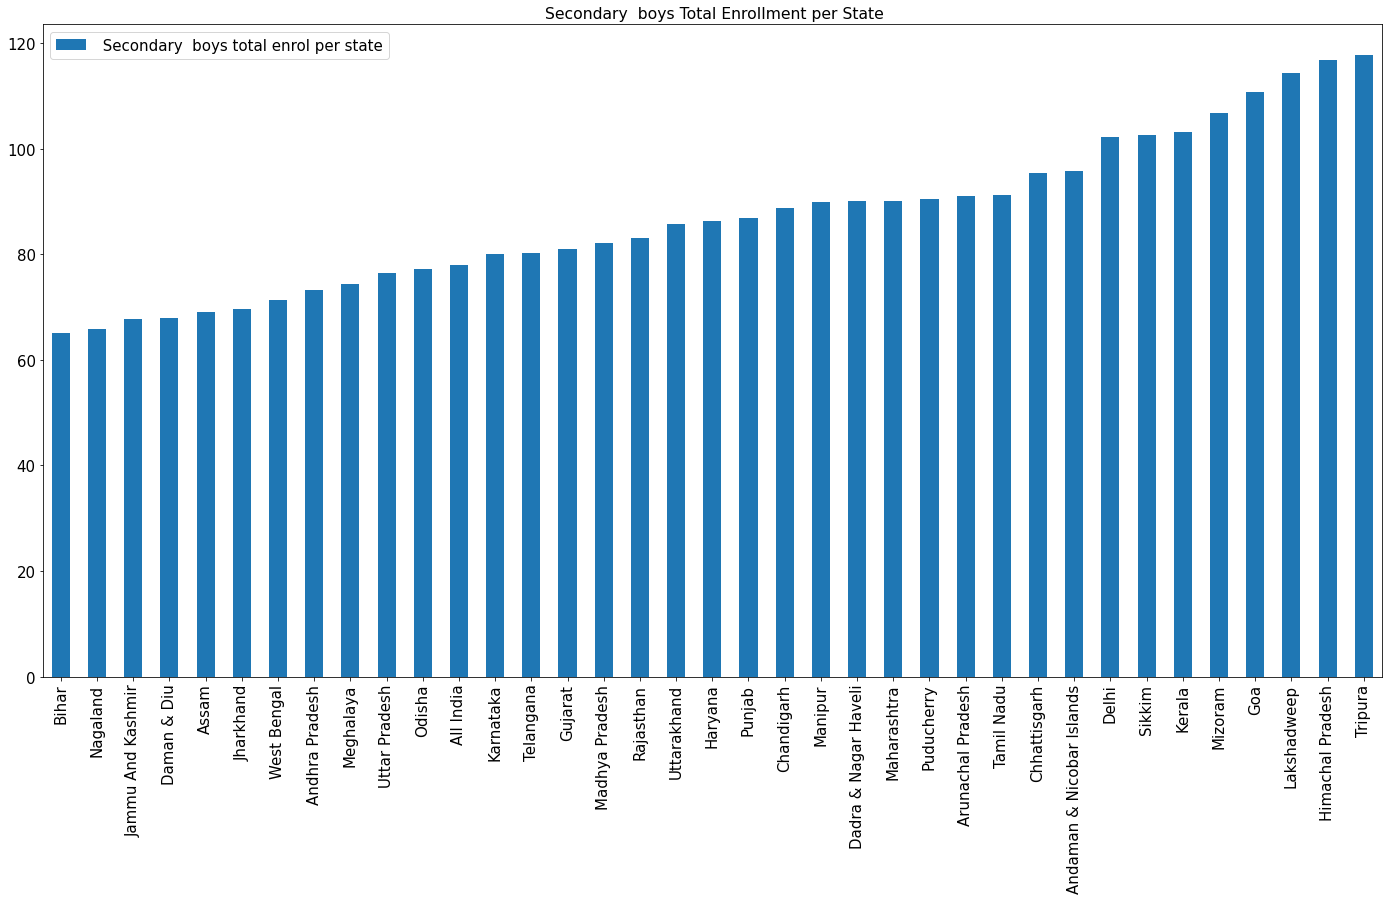

In [47]:
secondary_boys_total_enrol_per_state.sort_values(' Secondary  boys total enrol per state').plot(kind='bar', figsize=(24,12), title = ' Secondary  boys Total Enrollment per State')

### Bihar state has the least enrollment of Secondary school boys, while Tripura state enrols the most secondary school boys.

## Secondary Student Girls

In [48]:
secondary_girls = [i for i in secondary if i.split('_')[-1] == 'Girls']

In [49]:
secondary_girls_total_enrol = []

for state in states:
    secondary_girls_total_enrol.append(sum(mean_enrol_per_state.loc[state][secondary_girls]))   # Getting the total drop out for girls in the primary Student category type.

In [50]:
secondary_girls_total_enrol_per_state = pd.DataFrame(secondary_girls_total_enrol, index=states, columns=[' Secondary  girls total enrol per state'])


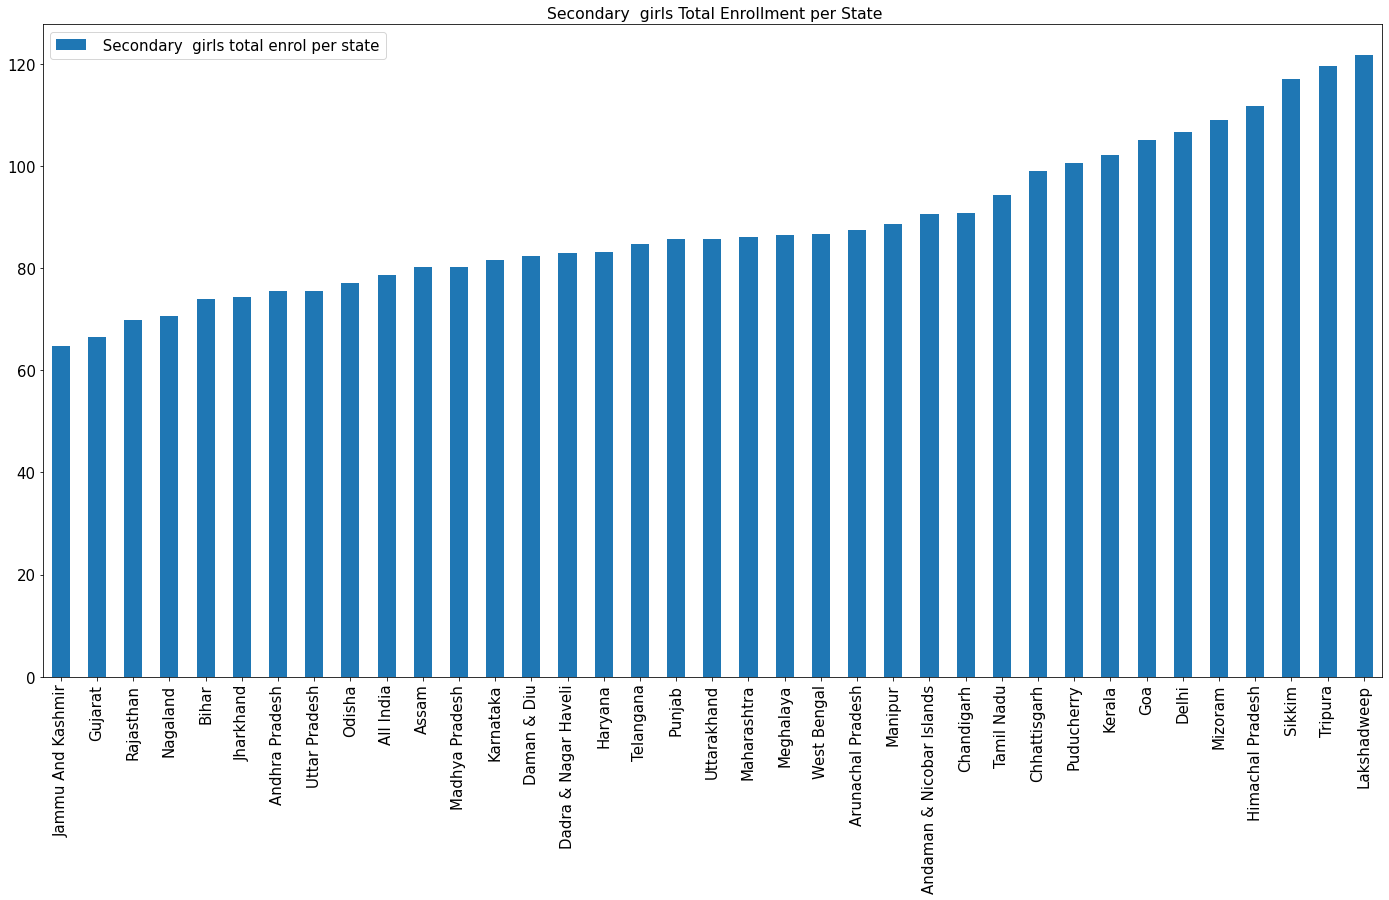

In [51]:
secondary_girls_total_enrol_per_state.sort_values(' Secondary  girls total enrol per state').plot(kind='bar', figsize=(24,12), title = ' Secondary  girls Total Enrollment per State')

### 'Jammu And Kashmir' state has the least enrollment of Secondary school girls, while Lakshadweep state enrols the most Secondary school girls.

## Higher Secondary(HrSecondary) Boys

In [52]:
HrSecondary_boys = [i for i in HrSecondary if i.split('_')[-1] == 'Boys']

In [53]:
HrSecondary_boys_total_enrol = []

for state in states:
    HrSecondary_boys_total_enrol.append(sum(mean_enrol_per_state.loc[state][HrSecondary_boys]))   # Getting the total drop out for boys in the primary Student category type.

In [54]:
HrSecondary_boys_total_enrol_per_state = pd.DataFrame(HrSecondary_boys_total_enrol, index=states, columns=[' HrSecondary  boys total enrol per state'])


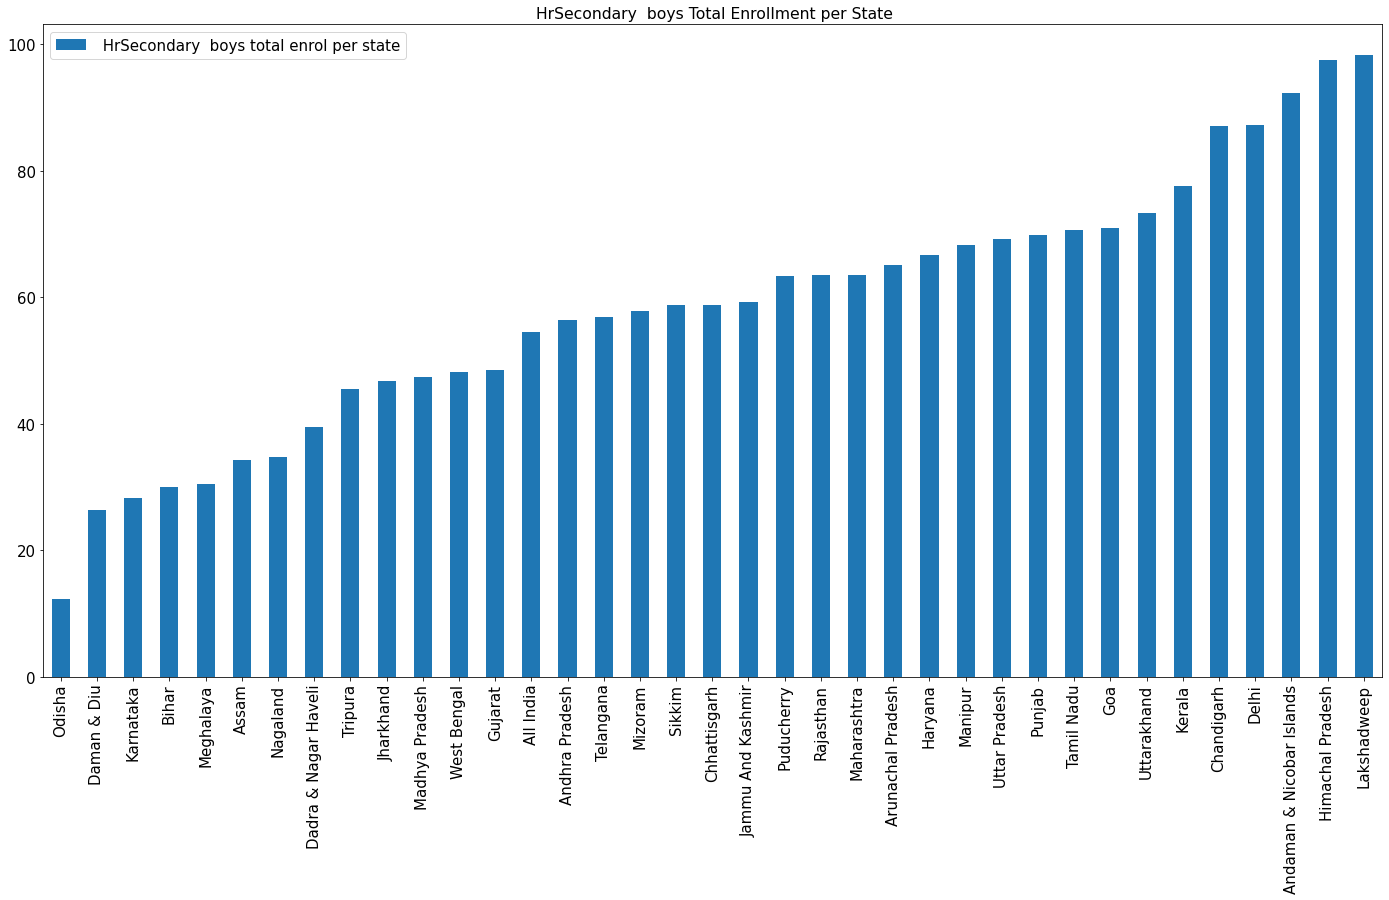

In [55]:
HrSecondary_boys_total_enrol_per_state.sort_values(' HrSecondary  boys total enrol per state').plot(kind='bar', figsize=(24,12), title = ' HrSecondary  boys Total Enrollment per State')

### Odisha state has the least enrollment of Higher Secondary school boys, while Lakshadweep state enrols the most Higher Secondary school boys.

### Higher Secondary Girls

In [56]:
HrSecondary_girls = [i for i in HrSecondary if i.split('_')[-1] == 'Girls']

In [57]:
HrSecondary_girls_total_enrol = []

for state in states:
    HrSecondary_girls_total_enrol.append(sum(mean_enrol_per_state.loc[state][HrSecondary_girls]))   # Getting the total drop out for girls in the primary Student category type.

In [58]:
HrSecondary_girls_total_enrol_per_state = pd.DataFrame(HrSecondary_girls_total_enrol, index=states, columns=[' HrSecondary  girls total enrol per state'])


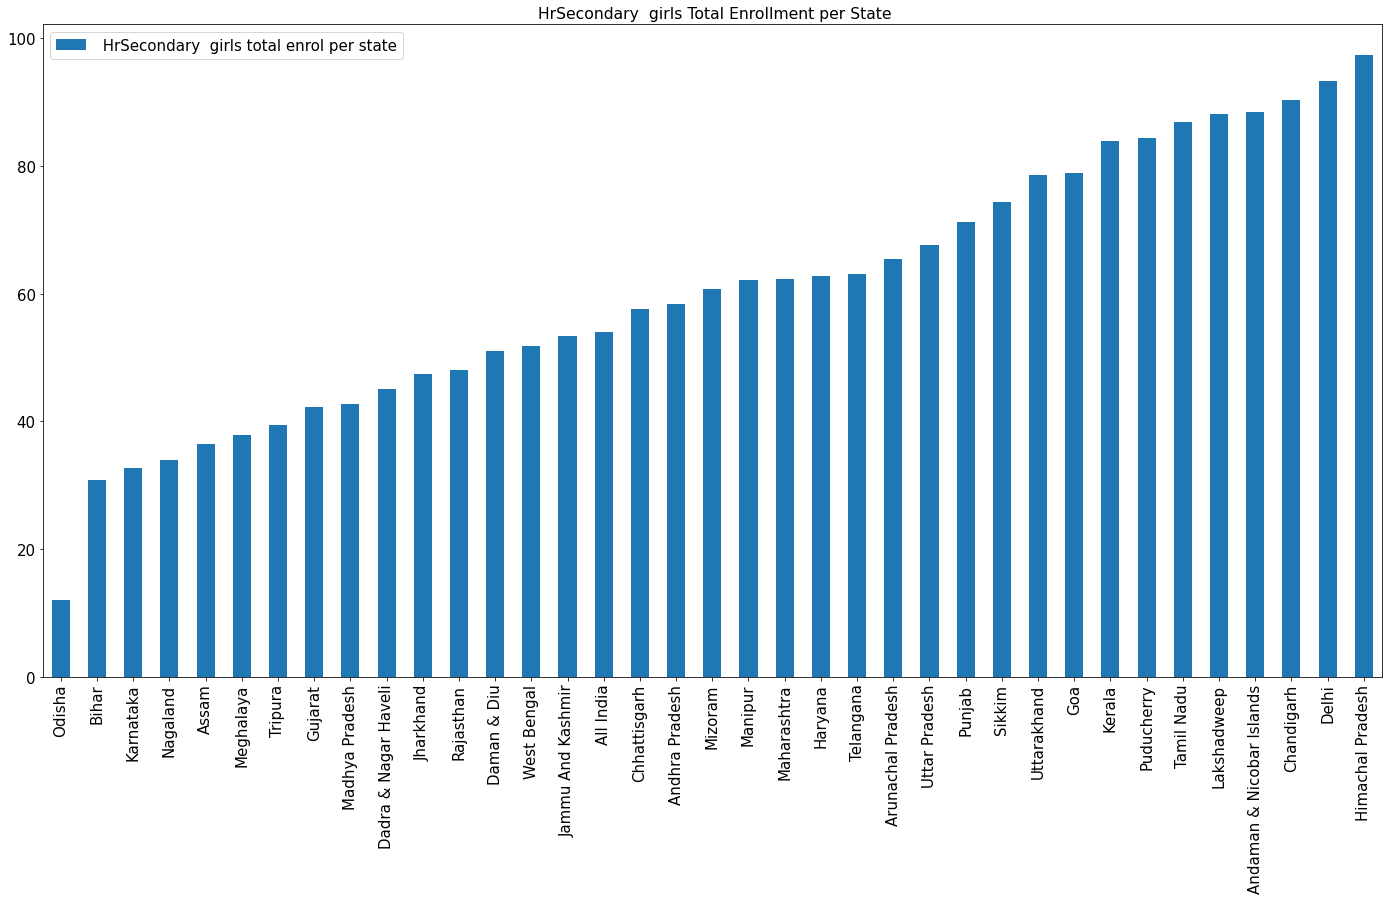

In [59]:
HrSecondary_girls_total_enrol_per_state.sort_values(' HrSecondary  girls total enrol per state').plot(kind='bar', figsize=(24,12), title = ' HrSecondary  girls Total Enrollment per State')

### Odisha state has the least enrollment for Higher Secondary girls, while 'Himachal Pradesh' has the highest enrollment of Higher Secondary girls

## Boys and Girls Enrollment for some states

In [60]:
mizoram = enrol.iloc[np.where(enrol.State_UT == 'Mizoram')]
delhi = enrol.iloc[np.where(enrol.State_UT == 'Delhi')]
jammuK = enrol.iloc[np.where(enrol.State_UT == 'Jammu And Kashmir')]
nagaland = enrol.iloc[np.where(enrol.State_UT == 'Nagaland')]
all_india = enrol.iloc[np.where(enrol.State_UT == 'All India')]

In [62]:
delhi

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
9,Delhi,2013-14,108.78,112.95,110.67,117.76,129.50,122.91,102.02,102.86,102.40,98.88,102.30,100.42
45,Delhi,2015-16,108.04,113.93,110.71,118.86,140.55,128.12,103.23,111.27,106.81,73.25,83.60,77.90
82,Delhi,2014-15,109.38,114.61,111.75,118.08,134.62,125.24,101.57,106.03,103.56,89.51,94.23,91.63


In [63]:
interest_states = [delhi, jammuK, mizoram, nagaland, all_india] 

### The interest_states were picked based on which states had high drop_out rate, gross enrollment, poor toilet facilities and all of india.

## Enrollment Ration for boys in selected states

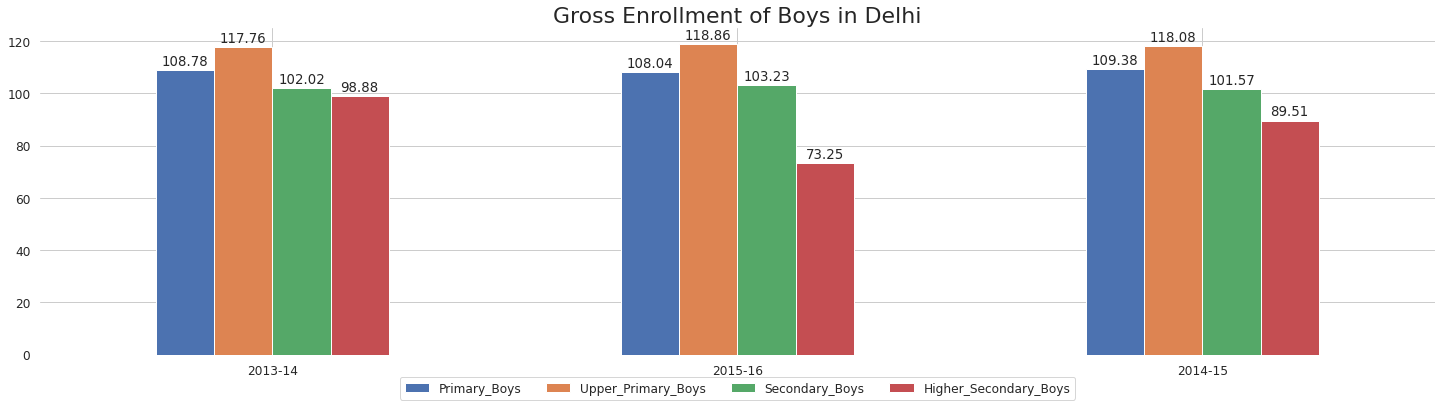

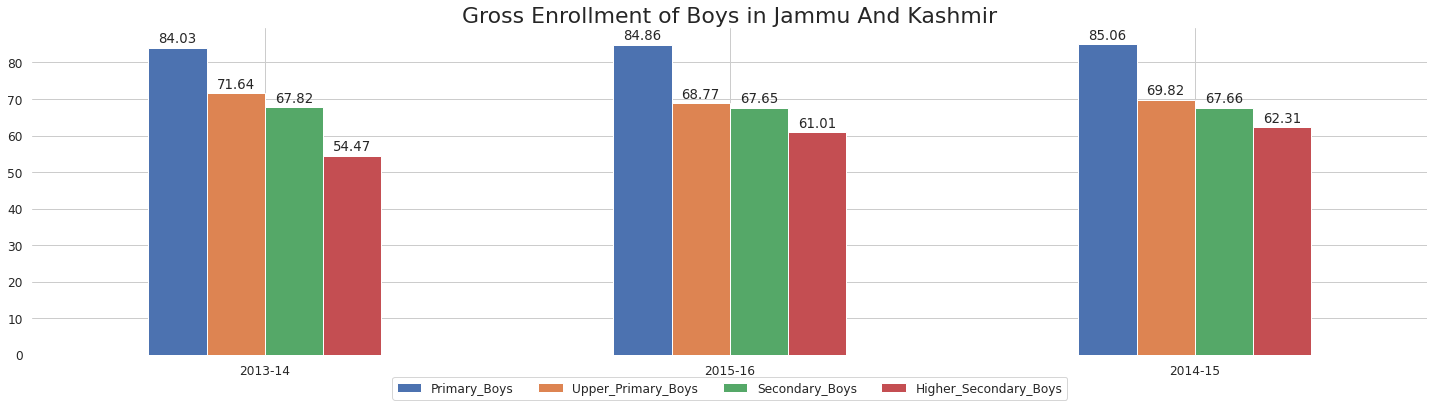

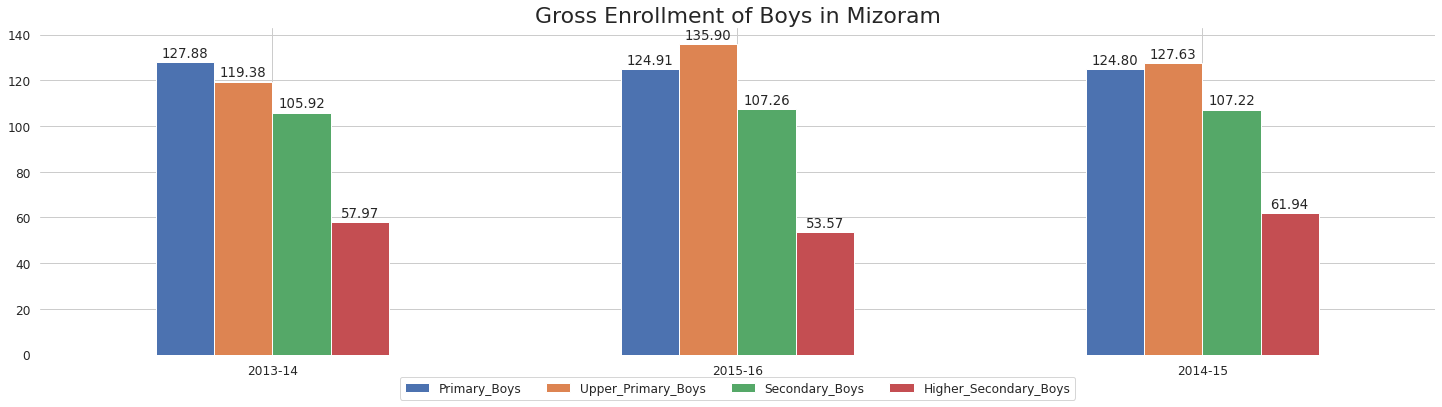

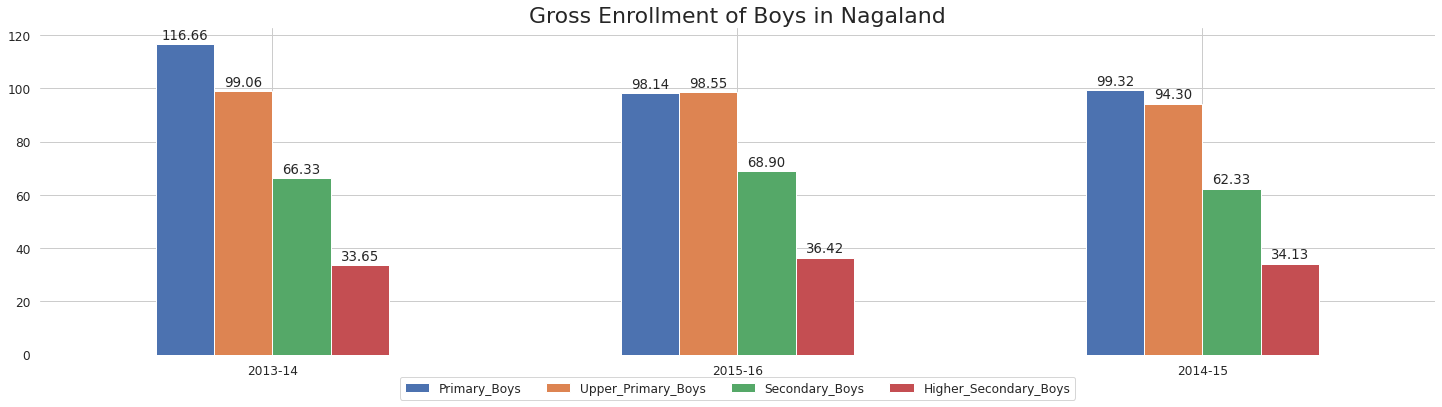

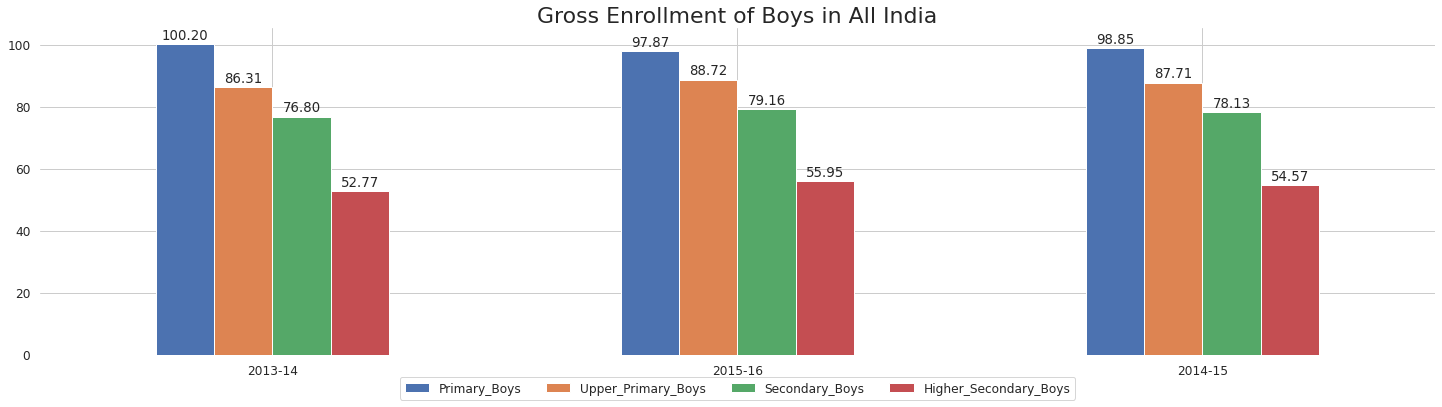

In [64]:
for interest in interest_states:
    sns.set(font_scale = 1.11)
    sns.set_style("whitegrid")
    ax = interest[boys].plot.bar(figsize=(25,8))
    sns.despine(left=True, bottom=True)

    #label and title
    ax.set_xticklabels(np.arange(3))
    ax.set_title('Gross Enrollment of Boys in {}'.format(interest.State_UT.to_list()[0]),size=22)
    ax.set_xticklabels(list(all_india['Year']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(-0)

    #annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    #adjust legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

<h3> From the Charts above, Delhi state has the most enrolled boys in the HR secondary category and also overall student categories, while Nagaland state has the least enrollment of HR secondary boys </h3>

## Enrollment Ration for girls in selected states

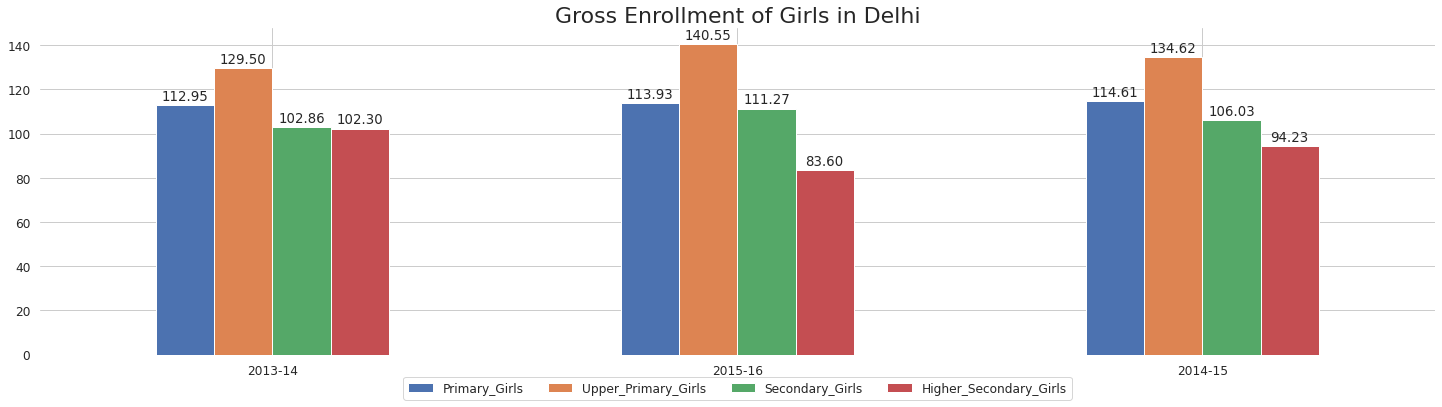

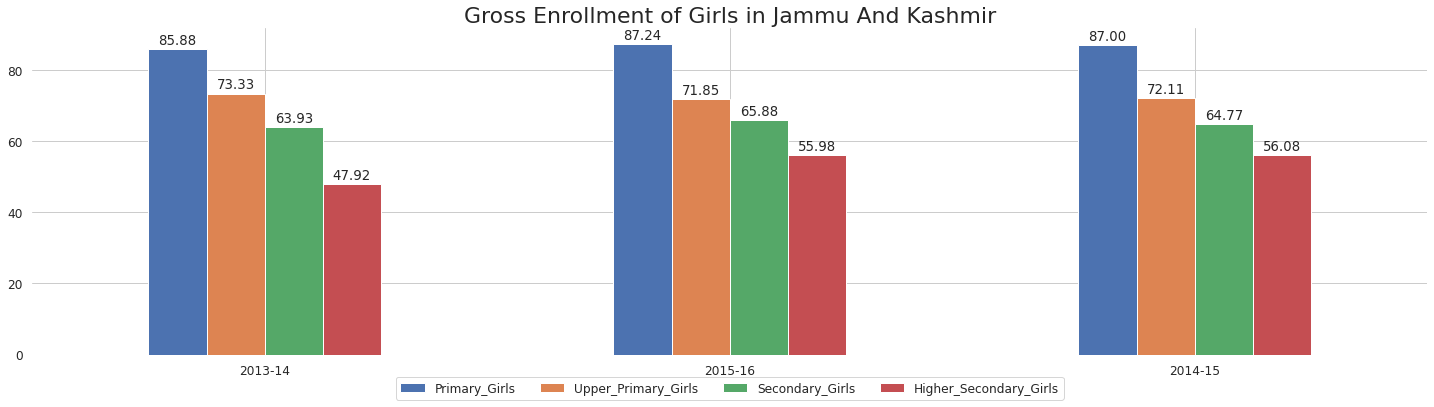

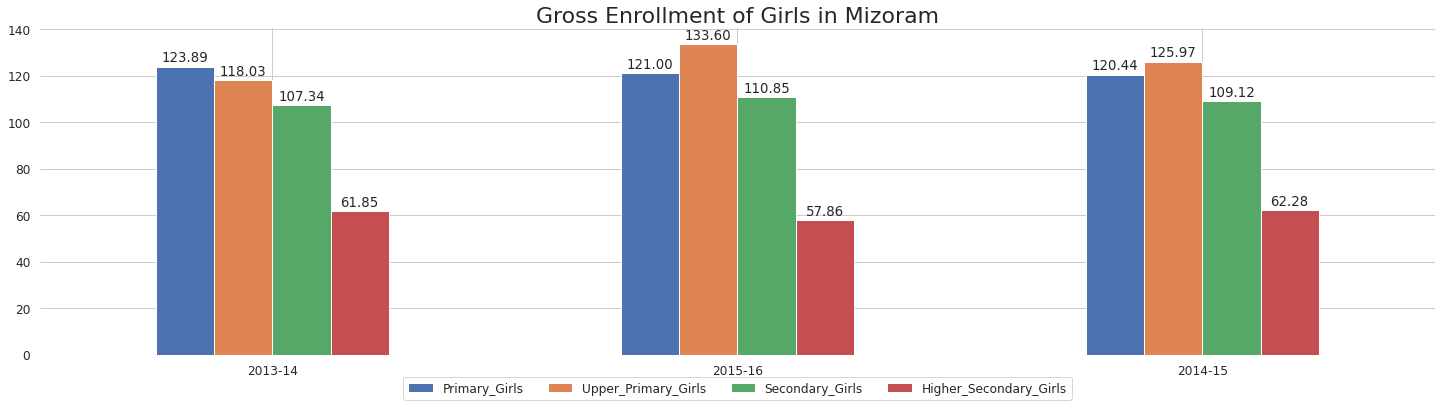

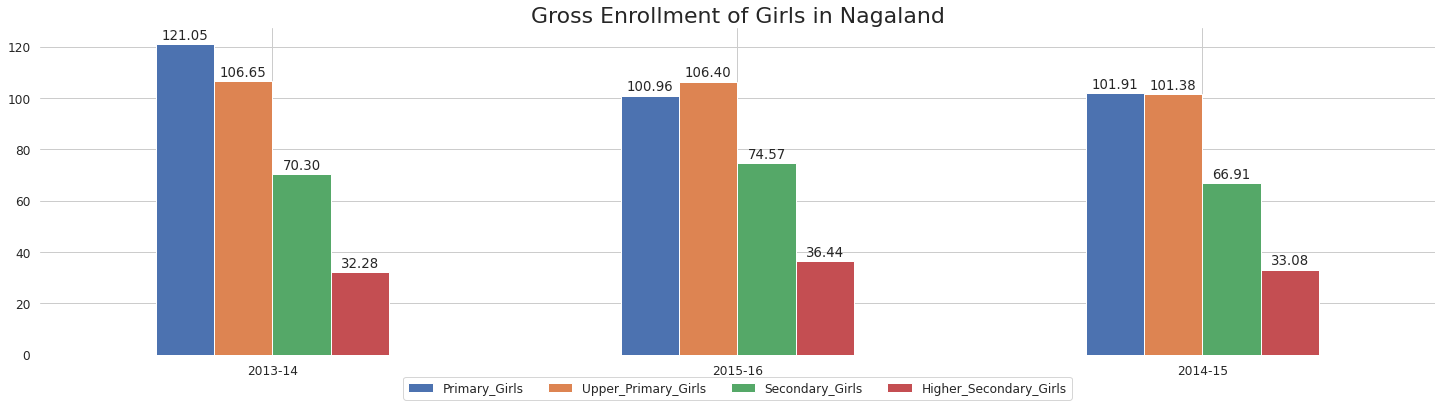

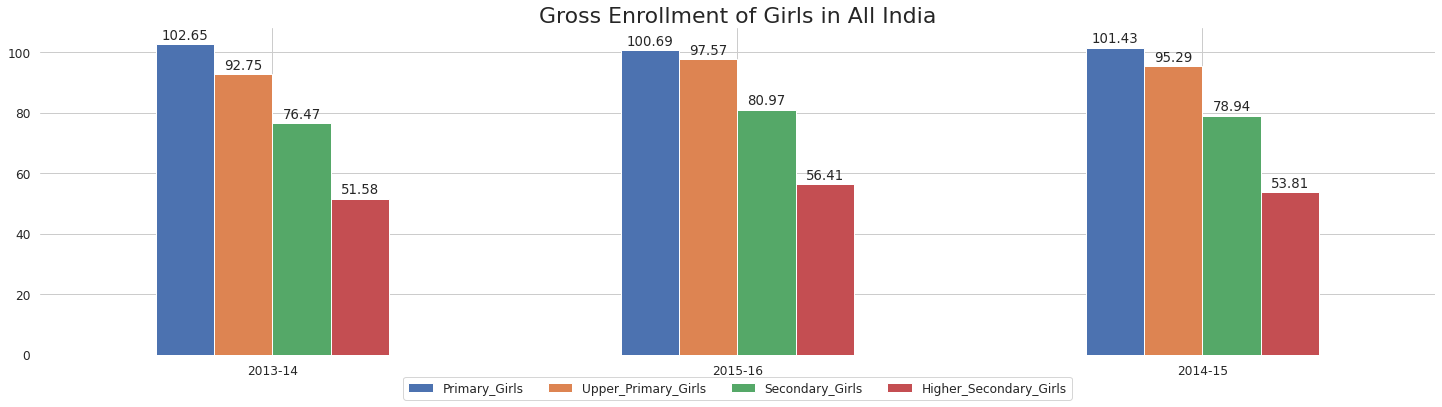

In [65]:
for interest in interest_states:
    sns.set(font_scale = 1.11)
    sns.set_style("whitegrid")
    ax = interest[girls].plot.bar(figsize=(25,6))
    sns.despine(left=True, bottom=True)

    #label and title
    ax.set_xticklabels(np.arange(3))
    ax.set_title('Gross Enrollment of Girls in {}'.format(interest.State_UT.to_list()[0]),size=22)
    ax.set_xticklabels(list(all_india['Year']))
    for tick in ax.get_xticklabels():
        tick.set_rotation(-0)

    #annotations
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
    #adjust legend
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=4)

### From the charts above,Primary student category has the highest average of enrollments in the interest_states, while HR Secondary student have the least enrollment rate.